### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Customize

In [5]:
# Specify the file path and field names
file_path = '0505 simulation_values.csv'

# Specify the names of the field to analyze
# Change to 'None' to skip
field1 = 'Simulated Returns'  
field2 = 'Simulated Index Values' 

# Specify the percentile values comma separated and between []
quantiles = [0.10, 0.25, 0.50, 0.75, 0.90]  

### Define the function to analyze, plot, and save

In [7]:
def analyze_data(file_path, field1=None, field2=None):
    # Load the data
    data = pd.read_csv(file_path)
    
    def plot_field(field_name):
        if field_name is not None and field_name in data.columns:
            
            # Calculate percentiles
            percentiles = data[field_name].quantile(quantiles)
            
            # Compute additional statistics
            mean_value = data[field_name].mean()
            max_value = data[field_name].max()
            min_value = data[field_name].min()

            # Print report
            print(f"\n--- Analysis Report for {field_name} ---")
            print(f"Mean: {mean_value:.4f}")
            print(f"Highest Value: {max_value:.4f}")
            print(f"Lowest Value: {min_value:.4f}")
            print("Calculated Percentiles:")
            print(percentiles)
            
            # Set up plots
            plt.figure(figsize=(12, 6))

            # Histogram
            plt.subplot(1, 2, 1)
            data[field_name].hist(bins=30, alpha=0.7)
            plt.title(f'Histogram of {field_name}')
            plt.xlabel(field_name)
            plt.ylabel('Frequency')

            # Boxplot
            plt.subplot(1, 2, 2)
            data.boxplot(column=[field_name])
            plt.title(f'Boxplot of {field_name}')
            plt.ylabel('Values')

            # Save the plots as a PNG file
            plt.tight_layout()
            plt.savefig(f'0508 {field_name.replace(" ", "_")}_analysis.png')
            plt.show()

    plot_field(field1)
    plot_field(field2)

### Run the function on input provided


--- Analysis Report for Simulated Returns ---
Mean: -0.0040
Highest Value: 0.1486
Lowest Value: -0.1665
Calculated Percentiles:
0.10   -0.05491
0.25   -0.03140
0.50   -0.00430
0.75    0.02300
0.90    0.04750
Name: Simulated Returns, dtype: float64


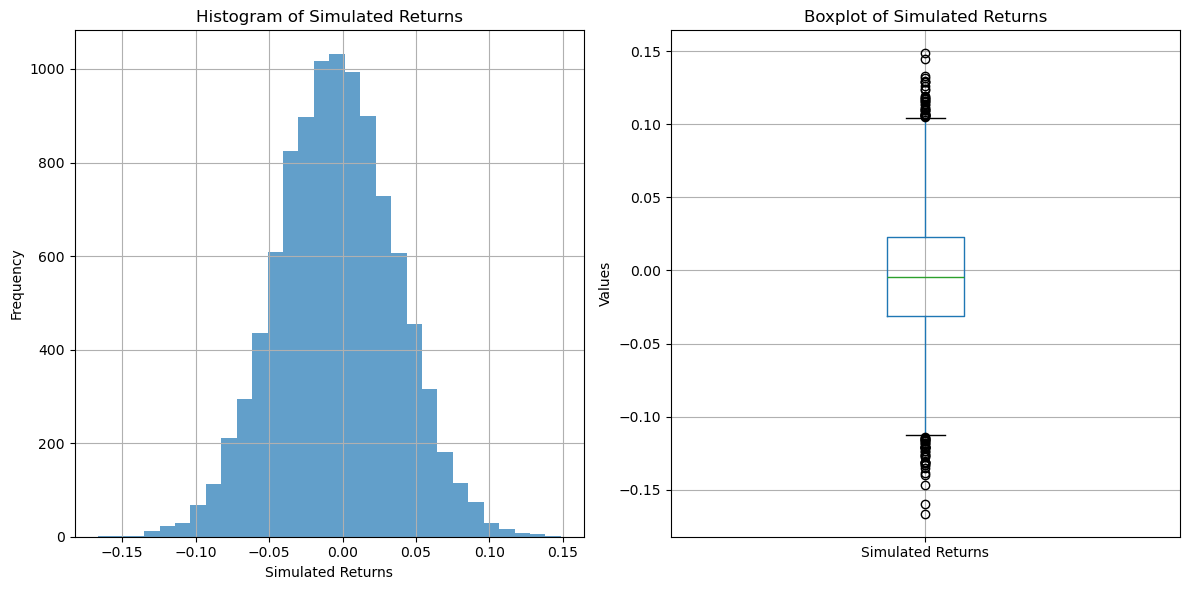


--- Analysis Report for Simulated Index Values ---
Mean: 5867.6585
Highest Value: 6829.6400
Lowest Value: 4983.9000
Calculated Percentiles:
0.10    5571.8060
0.25    5704.6900
0.50    5861.5450
0.75    6023.4725
0.90    6172.8560
Name: Simulated Index Values, dtype: float64


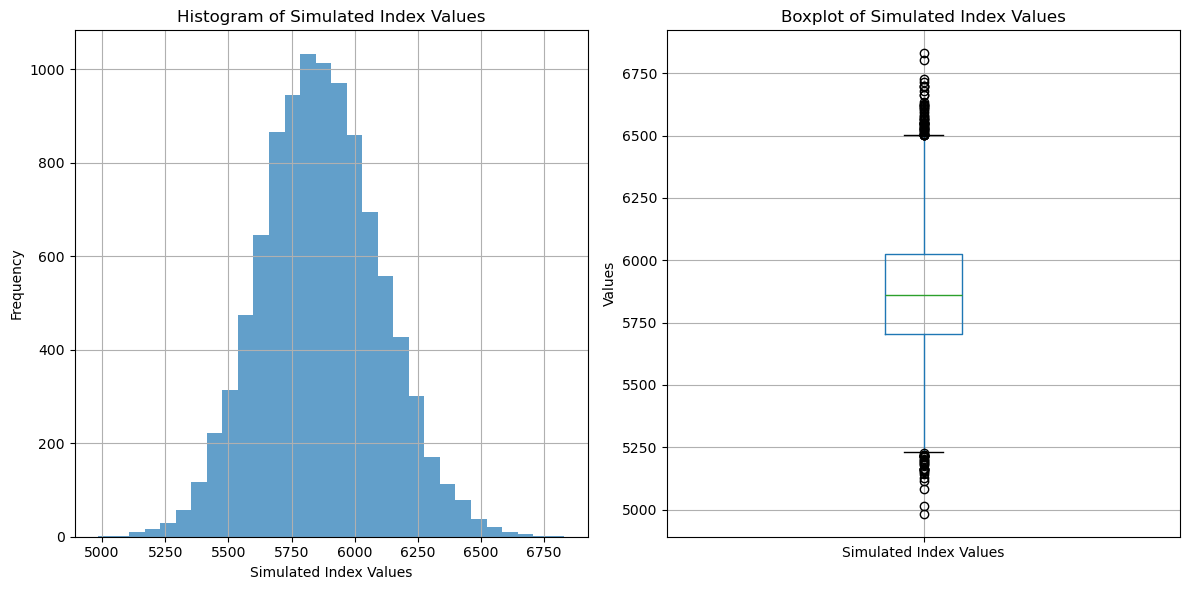

In [9]:
# Call the function
analyze_data(file_path, field1, field2)